In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
df = pd.read_csv('df_training_scholarjet.csv')
pd.set_option('display.max_columns',185)
pd.set_option('display.max_rows',185)
df.head()

Unnamed: 0  cuid  convert_30  revenue_30     roll_up currentstatus  \
0           1    20           0         0.0  Onboarding        Active   
1           2    57           0         0.0  Onboarding        Active   
2           3   163           0         0.0  Onboarding        Active   
3           4   167           0         0.0  Onboarding      Enrolled   
4           5   168           0         0.0  Onboarding      Enrolled   

  companytypegroup team            customersource accrole num_employees  \
0         Business   US      External Application    None        50plus   
1         Business   US      Internal Application    None          2to5   
2         Business   US      Internal Application    None             1   
3         Business   US  Internal Customer Scrape    None        50plus   
4         Business   US                   Gateway    None         6to10   

  num_purchases_year cost_purchases_year enrollmentmethod  numorderone  \
0               1to2           lessthan1        directEIN          0.0   
1             25plus             25to100        directEIN          0.0   
2               3to5                1to5        directEIN          0.0   
3               3to5           lessthan1        directEIN          NaN   
4             11to25               5to25        directEIN          NaN   

   numorderthreeone  numorderseventhree  numorderthirtyseven  \
0               0.0                 0.0                  1.0   
1               0.0                 0.0                  0.0   
2               0.0                 0.0                  1.0   
3               NaN                 NaN                  NaN   
4               NaN                 NaN                  NaN   

   numordersixtythirty  numorderyearsixty  sumrevone  sumrevthreeone  \
0                  0.0                0.0        0.0             0.0   
1                  0.0                1.0        0.0             0.0   
2                  0.0                0.0        0.0             0.0   
3                  NaN                NaN        NaN             NaN   
4                  NaN                NaN        NaN             NaN   

   sumrevseventhree  sumrevthirtyseven  sumrevsixtythirty  sumrevyearsixty  \
0               0.0              59.99                0.0             0.00   
1               0.0               0.00                0.0           126.48   
2               0.0             237.98                0.0             0.00   
3               NaN                NaN                NaN              NaN   
4               NaN                NaN                NaN              NaN   

   numbamorder  numselforder  totalrev     aov  dayssincelastord  cuidshare  \
0          0.0           1.0     59.99   59.99                17        1.0   
1          0.0           1.0    126.48  126.48                62        1.0   
2          0.0           1.0    237.98  237.98                27        1.0   
3          NaN           NaN       NaN     NaN              1000        NaN   
4          NaN           NaN       NaN     NaN              1000        NaN   

   numstores  pospercentage  numinf  numinfconnect  numinfphone  numinfquote  \
0        1.0            0.0     0.0            0.0          0.0          0.0   
1        1.0            0.0     0.0            0.0          0.0          0.0   
2        1.0            0.0     0.0            0.0          0.0          0.0   
3        NaN            NaN     NaN            NaN          NaN          NaN   
4        NaN            NaN     NaN            NaN          NaN          NaN   

   percentlarge  percdirtythirty  percdirtyninetythirty  percdirtyyearninety  \
0           0.0              0.0                    0.0                  0.0   
1           0.0              0.0                    0.0                  0.0   
2           0.0              0.0                    0.0                  0.0   
3           NaN              NaN                    NaN                  NaN   
4           NaN          

In [3]:
df.isnull().sum()

Unnamed: 0                           0
cuid                                 0
convert_30                           0
revenue_30                           0
roll_up                              0
currentstatus                        0
companytypegroup                     0
team                                 0
customersource                       0
accrole                              0
num_employees                        0
num_purchases_year                   0
cost_purchases_year                  0
enrollmentmethod                     0
numorderone                      18424
numorderthreeone                 18424
numorderseventhree               18424
numorderthirtyseven              18424
numordersixtythirty              18424
numorderyearsixty                18424
sumrevone                        18424
sumrevthreeone                   18424
sumrevseventhree                 18424
sumrevthirtyseven                18426
sumrevsixtythirty                18425
sumrevyearsixty          

In [4]:
df

Unnamed: 0    cuid  convert_30  revenue_30     roll_up currentstatus  \
0               1      20           0        0.00  Onboarding        Active   
1               2      57           0        0.00  Onboarding        Active   
2               3     163           0        0.00  Onboarding        Active   
3               4     167           0        0.00  Onboarding      Enrolled   
4               5     168           0        0.00  Onboarding      Enrolled   
5               9     215           0        0.00  Onboarding      Enrolled   
6              12     285           0        0.00  Onboarding      Enrolled   
7              14     363           1      323.97  Onboarding        Active   
8              15     401           0        0.00  Onboarding        Active   
9              17     421           0        0.00  Onboarding      Enrolled   
10             22     607           0        0.00  Onboarding      Enrolled   
11             24     643           0        0.00  Onboarding      Enrolled   
12             27     681           0        0.00  Onboarding      Enrolled   
13             28     688           0        0.00  Onboarding        Active   
14             30     699           0        0.00  Onboarding      Enrolled   
15             32     769           0        0.00  Onboarding      Enrolled   
16             33     787           0        0.00  Onboarding      Enrolled   
17             35     848           0        0.00  Onboarding      Enrolled   
18             37     932           0        0.00  Onboarding      Enrolled   
19             38     947           0        0.00  Onboarding        Active   
20             43    1101           0        0.00  Onboarding      Enrolled   
21             44    1104           0        0.00  Onboarding      Enrolled   
22             47    1142           0        0.00  Onboarding        Active   
23             57    1313           0        0.00  Onboarding      Enrolled   
24             59    1328           1       34.94  Onboarding      Enrolled   
25             60    1338           0        0.00  Onboarding      Enrolled   
26             61    1348           0        0.00  Onboarding      Enrolled   
27             62    1359           0        0.00  Onboarding      Enrolled   
28             66    1397           0        0.00  Onboarding      Enrolled   
29             69    1447           0        0.00  Onboarding      Enrolled   
30             70    1466           0        0.00  Onboarding      Enrolled   
31             72    1519           0        0.00  Onboarding      Enrolled   
32             73    1565           0        0.00  Onboarding        Active   
33             76    1631           0        0.00  Onboarding      Enrolled   
34             78    1716           1     4398.06  Onboarding      Enrolled   
35             82    1837           0        0.00  Onboarding      Enrolled   
36             83    1882           0        0.00  Onboarding      Enrolled   
37             85    1889           0        0.00  Onboarding      Enrolled   
38             90    1975           0        0.00  Onboarding      Enrolled   
39             91    1994           0        0.00  Onboarding      Enrolled   
40             94    2069           1     1905.63  Onboarding      Enrolled   
41             96    2128           0        0.00  Onboarding      Enrolled   
42             97    2137           1     2022.69  Onboarding      Enrolled   
43            101    2170           1      489.99  Onboarding        Active   
44            104    2288           0        0.00  Onboarding        Active   
45            105    2300           0        0.00  Onboarding      Enrolled   
46            107    2365           0        0.00  Onboarding      Enrolled   
47            111    2400           0        0.00  Onboarding        Active   
48            117    2465           0        0.00  Onboarding      Enrolled   
49            118    2478           1     7632.70  Onboar

In [5]:
data = df.interpolate(method='linear', limit_direction='both',axis=0)
data.isnull().sum()

Unnamed: 0                       0
cuid                             0
convert_30                       0
revenue_30                       0
roll_up                          0
currentstatus                    0
companytypegroup                 0
team                             0
customersource                   0
accrole                          0
num_employees                    0
num_purchases_year               0
cost_purchases_year              0
enrollmentmethod                 0
numorderone                      0
numorderthreeone                 0
numorderseventhree               0
numorderthirtyseven              0
numordersixtythirty              0
numorderyearsixty                0
sumrevone                        0
sumrevthreeone                   0
sumrevseventhree                 0
sumrevthirtyseven                0
sumrevsixtythirty                0
sumrevyearsixty                  0
numbamorder                      0
numselforder                     0
totalrev            

In [6]:
data['order'] = data['numorderone']+data['numorderthreeone']+data['numorderseventhree']+data['numorderthirtyseven']

In [7]:
data['revenue'] = data['sumrevone']+data['sumrevthreeone']+data['sumrevseventhree']+data['sumrevthirtyseven']

In [8]:
data.head()

Unnamed: 0  cuid  convert_30  revenue_30     roll_up currentstatus  \
0           1    20           0         0.0  Onboarding        Active   
1           2    57           0         0.0  Onboarding        Active   
2           3   163           0         0.0  Onboarding        Active   
3           4   167           0         0.0  Onboarding      Enrolled   
4           5   168           0         0.0  Onboarding      Enrolled   

  companytypegroup team            customersource accrole num_employees  \
0         Business   US      External Application    None        50plus   
1         Business   US      Internal Application    None          2to5   
2         Business   US      Internal Application    None             1   
3         Business   US  Internal Customer Scrape    None        50plus   
4         Business   US                   Gateway    None         6to10   

  num_purchases_year cost_purchases_year enrollmentmethod  numorderone  \
0               1to2           lessthan1        directEIN          0.0   
1             25plus             25to100        directEIN          0.0   
2               3to5                1to5        directEIN          0.0   
3               3to5           lessthan1        directEIN          0.0   
4             11to25               5to25        directEIN          0.0   

   numorderthreeone  numorderseventhree  numorderthirtyseven  \
0               0.0                 0.0                  1.0   
1               0.0                 0.0                  0.0   
2               0.0                 0.0                  1.0   
3               0.0                 0.0                  0.8   
4               0.0                 0.0                  0.6   

   numordersixtythirty  numorderyearsixty  sumrevone  sumrevthreeone  \
0                  0.0                0.0        0.0             0.0   
1                  0.0                1.0        0.0             0.0   
2                  0.0                0.0        0.0             0.0   
3                  0.4                0.0        0.0             0.0   
4                  0.8                0.0        0.0             0.0   

   sumrevseventhree  sumrevthirtyseven  sumrevsixtythirty  sumrevyearsixty  \
0               0.0             59.990               0.00             0.00   
1               0.0              0.000               0.00           126.48   
2               0.0            237.980               0.00             0.00   
3               0.0            190.384             726.31             0.00   
4               0.0            142.788            1452.62             0.00   

   numbamorder  numselforder  totalrev      aov  dayssincelastord  cuidshare  \
0          0.0           1.0    59.990   59.990                17        1.0   
1          0.0           1.0   126.480  126.480                62        1.0   
2          0.0           1.0   237.980  237.980                27        1.0   
3          0.0           1.2   916.694  553.539              1000        1.0   
4          0.0           1.4  1595.408  869.098              1000        1.0   

   numstores  pospercentage  numinf  numinfconnect  numinfphone  numinfquote  \
0        1.0            0.0     0.0            0.0          0.0          0.0   
1        1.0            0.0     0.0            0.0          0.0          0.0   
2        1.0            0.0     0.0            0.0          0.0          0.0   
3        1.0            0.0     0.2            0.2          0.0          0.0   
4        1.0            0.0     0.4            0.4          0.0          0.0   

   percentlarge  percdirtythirty  percdirtyninetythirty  percdirtyyearninety  \
0           0.0              0.0                    0.0                  0.0   
1           0.0              0.0                    0.0                  0.0   
2           0.0              0.0                    0.0                  0.0   
3           0.0              0.0                    0.0                  0.0   
4           0.0    

In [9]:
data.describe()

Unnamed: 0           cuid    convert_30    revenue_30   numorderone  \
count  28126.000000   28126.000000  28126.000000  28126.000000  28126.000000   
mean   26422.953459  265872.713859      0.104103     75.038997      0.023590   
std    12107.891765  152691.063013      0.305399    508.874716      0.134635   
min        1.000000      10.000000      0.000000      0.000000      0.000000   
25%    18075.500000  134457.500000      0.000000      0.000000      0.000000   
50%    29353.500000  264617.500000      0.000000      0.000000      0.000000   
75%    36384.750000  398016.500000      0.000000      0.000000      0.000000   
max    43416.000000  532166.000000      1.000000  34986.689900      3.000000   

       numorderthreeone  numorderseventhree  numorderthirtyseven  \
count      28126.000000        28126.000000         28126.000000   
mean           0.039572            0.082504             0.337197   
std            0.178346            0.263124             0.611840   
min            0.000000            0.000000             0.000000   
25%            0.000000            0.000000             0.000000   
50%            0.000000            0.000000             0.000000   
75%            0.000000            0.000000             0.571429   
max            4.000000            5.000000            16.000000   

       numordersixtythirty  numorderyearsixty     sumrevone  sumrevthreeone  \
count         28126.000000       28126.000000  28126.000000    28126.000000   
mean              0.315687           1.170963     12.425285       18.229459   
std               0.678299           1.633457    107.567494      138.648392   
min               0.000000           0.000000      0.000000        0.000000   
25%               0.000000           0.000000      0.000000        0.000000   
50%               0.000000           1.000000      0.000000        0.000000   
75%               0.500000           1.600000      0.000000        0.000000   
max              18.000000          57.000000   3799.450000     8004.060000   

       sumrevseventhree  sumrevthirtyseven  sumrevsixtythirty  \
count      28126.000000       28126.000000       28126.000000   
mean          44.671220         150.341150         132.784545   
std          290.822401         495.220236         409.941146   
min            0.000000           0.000000           0.000000   
25%            0.000000           0.000000           0.000000   
50%            0.000000           0.000000           0.000000   
75%            0.000000         110.990000          81.995750   
max         9984.470000       28492.000000       13795.470000   

       sumrevyearsixty   numbamorder  numselforder      totalrev  \
count     28126.000000  28126.000000  28126.000000  28126.000000   
mean        523.667416      0.185025      1.784488    882.252309   
std        1253.406730      0.512269      1.818250   1474.393369   
min           0.000000      0.000000      0.000000      1.000000   
25%           0.000000      0.000000      1.000000    253.735625   
50%         196.067400      0.000000      1.000000    496.294000   
75%         585.147500      0.000000      2.000000    988.905000   
max       69119.410000     18.000000     58.000000  69119.410000   

                aov  dayssincelastord     cuidshare     numstores  \
count  28126.000000      28126.000000  28126.000000  28126.000000   
mean     465.620897        680.162305      0.982080      1.077651   
std      798.873638        442.298992      0.104211      0.261210   
min        1.000000          1.000000      0.000000      1.000000   
25%      181.990000        113.000000      1.000000      1.000000   
50%      308.004444       1000.000000      1.000000      1.000000   
75%      549.980250       1000.000000      1.000000      1.000000   
max    69119.410000       1000.000000      1.000000      4.000000   

       pospercentage        numinf  numinfconnect   numinfphone   numinfquote  \
count   28126.000000  28126.000000   28126.000000  28126.0000

In [10]:
data.corr()

Unnamed: 0      cuid  convert_30  revenue_30  \
Unnamed: 0                       1.000000  0.369832   -0.138588   -0.072243   
cuid                             0.369832  1.000000   -0.027763   -0.003217   
convert_30                      -0.138588 -0.027763    1.000000    0.432595   
revenue_30                      -0.072243 -0.003217    0.432595    1.000000   
numorderone                     -0.090225  0.015804    0.055670    0.029787   
numorderthreeone                -0.154552 -0.004648    0.057234    0.029309   
numorderseventhree              -0.179197 -0.006346    0.084025    0.062922   
numorderthirtyseven             -0.303903 -0.027220    0.120427    0.094121   
numordersixtythirty             -0.161649 -0.026029    0.083975    0.049471   
numorderyearsixty                0.333715  0.017273    0.002956    0.015331   
sumrevone                       -0.058273  0.018722    0.036707    0.036052   
sumrevthreeone                  -0.095015 -0.006510    0.032216    0.028120   
sumrevseventhree                -0.103204  0.006965    0.050109    0.084150   
sumrevthirtyseven               -0.171501  0.019878    0.083015    0.145759   
sumrevsixtythirty               -0.155589 -0.011531    0.059255    0.055633   
sumrevyearsixty                  0.142812  0.051644    0.019800    0.054233   
numbamorder                      0.002358  0.041833    0.037496    0.053453   
numselforder                     0.088795 -0.015343    0.085837    0.063026   
totalrev                        -0.012997  0.049473    0.076777    0.132397   
aov                             -0.048054  0.058446    0.014955    0.035852   
dayssincelastord                 0.014574  0.066141   -0.141779   -0.052822   
cuidshare                       -0.016097 -0.097514   -0.005662   -0.008693   
numstores                        0.035714 -0.026130    0.036680    0.018161   
pospercentage                    0.033596 -0.006959   -0.004488   -0.009400   
numinf                          -0.020556  0.041992    0.061410    0.081286   
numinfconnect                   -0.014838  0.012833    0.044385    0.074205   
numinfphone                     -0.014465  0.041368    0.043884    0.044838   
numinfquote                     -0.007352  0.012902    0.023599    0.090526   
percentlarge                    -0.058367  0.028237    0.008328    0.026393   
percdirtythirty                 -0.193913 -0.006946    0.078964    0.041657   
percdirtyninetythirty           -0.086011  0.006552    0.031274    0.014823   
percdirtyyearninety              0.244202  0.027165   -0.039378   -0.020237   
numbilling                       0.031808  0.004682    0.001338    0.000701   
numreturn                        0.006777  0.004456    0.022286    0.008319   
numwims                         -0.005012  0.032674    0.015294    0.012491   
numproblem                       0.039553  0.039781    0.014385    0.044694   
numother                        -0.000787  0.014794    0.020385    0.032631   
percentresolved                 -0.011086 -0.026972    0.008397   -0.010287   
minnps                          -0.063931 -0.073292    0.019590    0.011683   
avgnps                          -0.068002 -0.080859    0.021607    0.013250   
maxnps                          -0.070860 -0.086945    0.023189    0.014611   
nps_count                       -0.032842 -0.071559    0.025440    0.023745   
numquote                         0.026307  0.059532    0.019879    0.051061   
numorderfromquote                0.018941  0.091263    0.028227    0.024977   
quoteconrate                     0.038627  0.069808    0.009661   -0.002715   
avgquoteprice                   -0.054820 -0.020952    0.009240    0.015224   
avgconquoteprice                -0.073499  0.061617    0.021234    0.023219   
numvisitone                     -0.168648 -0.022906    0.193316    0.126148   
numvisitthreeone                -0.208919 -0.035970    0.222754    0.130749   
numvisitseventhree              -0.234126 -0.041146    0.237042    0.155843   
nu

In [11]:
data.corr()['revenue'].sort_values(ascending=False)

revenue                          1.000000
sumrevthirtyseven                0.831518
order                            0.568573
sumrevseventhree                 0.517264
numorderthirtyseven              0.465360
totalrev                         0.426572
aov                              0.316475
numorderseventhree               0.290285
percdirtythirty                  0.269337
numinf                           0.269126
sumrevthreeone                   0.242125
numtotalpageviewsthirtyseven     0.231633
numinfquote                      0.228583
numsecondsonsitethirtyseven      0.222288
numatcthirtyseven                0.220225
numloggedinthirtyseven           0.218664
numsearchtermsthirtyseven        0.213807
numvisitthirtyseven              0.213079
numskusviewedthirtyseven         0.208330
numcallsthirtyseven              0.201414
numinfconnect                    0.199851
numinfphone                      0.199763
percentlarge                     0.199571
numloggedinseventhree            0

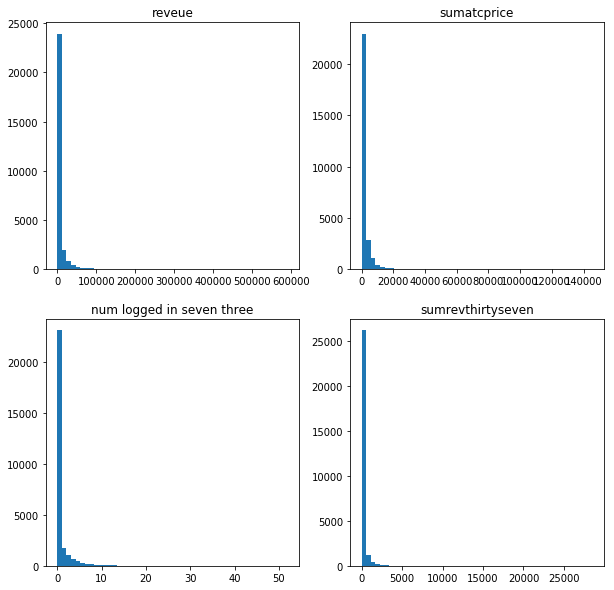

In [12]:
f, ax = plt.subplots(2,2)
ax[0,0].hist(data.numsecondsonsitethirtyseven,bins = 50)
ax[0,0].set_title("reveue")
ax[0,1].hist(data.sumatcprice,bins = 50)
ax[0,1].set_title("sumatcprice")
ax[1,0].hist(data.numvisitseventhree,bins = 50)
ax[1,0].set_title("num logged in seven three")
ax[1,1].hist(data.sumrevthirtyseven,bins = 50)
ax[1,1].set_title("sumrevthirtyseven")
f.subplots_adjust(hspace=0.2)
f.set_figheight(10)
f.set_figwidth(10)

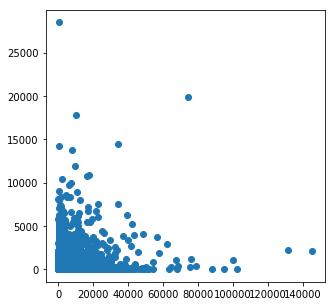

[[258953.47665323  53143.07541256]
 [ 53143.07541256 378982.3692237 ]]


In [13]:
%matplotlib inline
rcParams['figure.figsize'] = (5,5)
plt.scatter(x = data['sumatcprice'], y = data['revenue'],data = data)
plt.show()
print(np.cov(data['revenue_30'],data['revenue']))

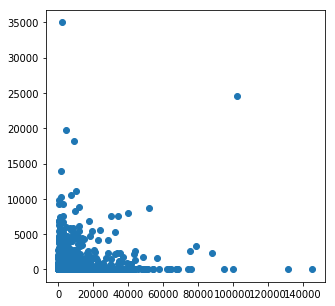

In [14]:
plt.scatter(x=data['sumatcprice'], y=data['revenue_30'])

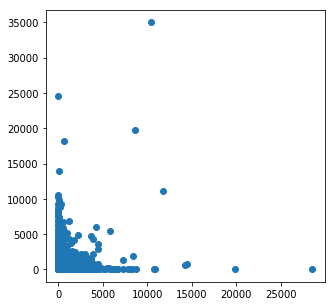

In [15]:
plt.scatter(x=data['sumrevthirtyseven'],y=data['revenue_30'])
plt.show()

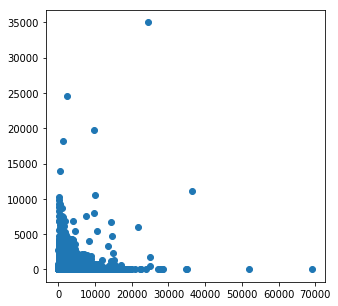

In [16]:
plt.scatter(x=data['totalrev'],y=data['revenue_30'])

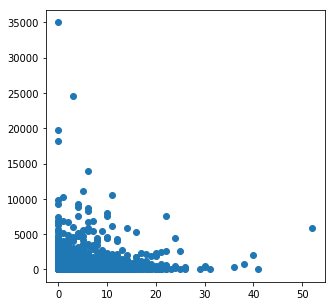

In [17]:
plt.scatter(x=data['numvisitseventhree'],y=data['revenue_30'])

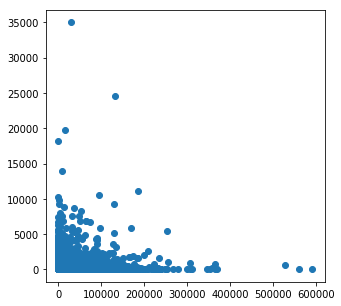

In [18]:
plt.scatter(x=data['numsecondsonsitethirtyseven'],y=data['revenue_30'])

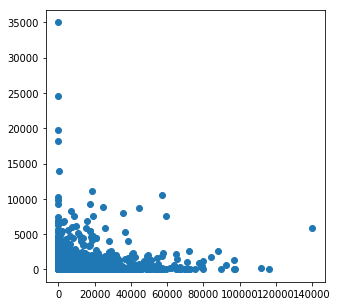

In [19]:
plt.scatter(x=data['numsecondsonsiteseventhree'],y=data['revenue_30'])

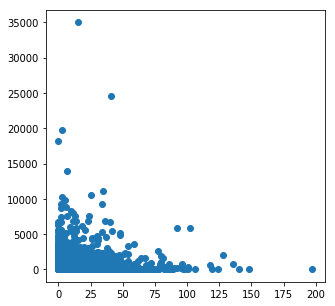

In [20]:
plt.scatter(x=data['numvisitthirtyseven'],y=data['revenue_30'])

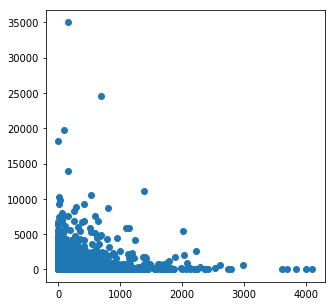

In [21]:
plt.scatter(x=data['numtotalpageviewsthirtyseven'],y=data['revenue_30'])

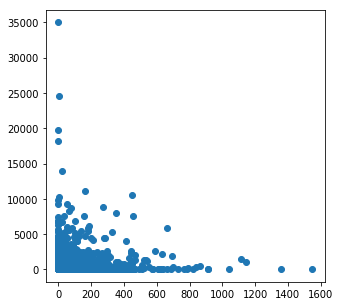

In [22]:
plt.scatter(x=data['numtotalpageviewsseventhree'],y=data['revenue_30'])

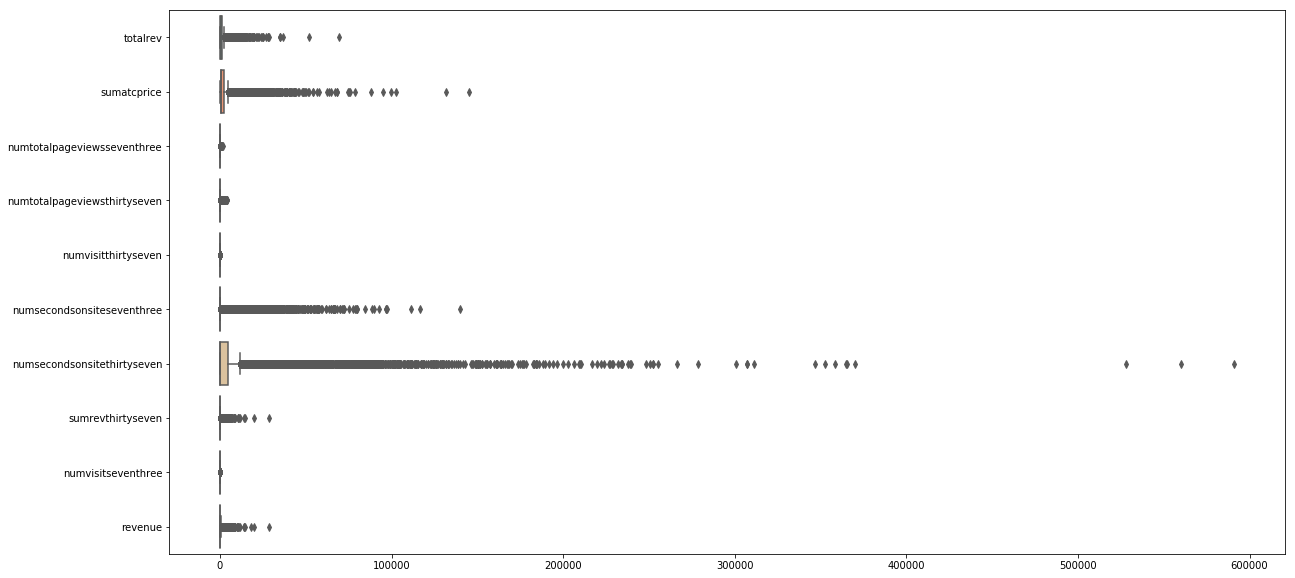

In [23]:
features = ['totalrev','sumatcprice','numtotalpageviewsseventhree','numtotalpageviewsthirtyseven','numvisitthirtyseven','numsecondsonsiteseventhree','numsecondsonsitethirtyseven','sumrevthirtyseven','numvisitseventhree','revenue']
rcParams['figure.figsize'] = (20,10)
fig, axs = plt.subplots()
featuresdata = data[features]
sns.boxplot(data=featuresdata,orient='h',palette="Set2")
plt.show()

In [24]:
# q75, q25 = np.percentile(data["sumatcprice"], [75 ,25])
# iqr = q75-q25
# print("IQR",iqr)
# whisker = q75 + (1.5*iqr)
# print("Upper whisker",whisker)

In [25]:
features = ['totalrev','sumatcprice','numtotalpageviewsseventhree','numtotalpageviewsthirtyseven','numvisitthirtyseven','numsecondsonsiteseventhree','numsecondsonsitethirtyseven','sumrevthirtyseven','numvisitseventhree','revenue']
for i in features:
    q75, q25 = np.percentile(data[i], [75 ,25])
    iqr = q75-q25
    print("IQR",iqr)
    whisker = q75 + (1.5*iqr)
    print("Upper whisker",whisker)
    data[i] = data[i].clip(upper=whisker)

IQR 735.169375
Upper whisker 2091.6590625
IQR 1779.784
Upper whisker 4789.460000000001
IQR 3.0
Upper whisker 7.5
IQR 52.0
Upper whisker 130.0
IQR 5.0
Upper whisker 12.5
IQR 54.0
Upper whisker 135.0
IQR 4623.25
Upper whisker 11558.125
IQR 110.99
Upper whisker 277.47499999999997
IQR 1.0
Upper whisker 2.5
IQR 215.9658333333333
Upper whisker 539.9145833333332


In [26]:
# data["sumatcprice"] = data["sumatcprice"].clip(upper=whisker)

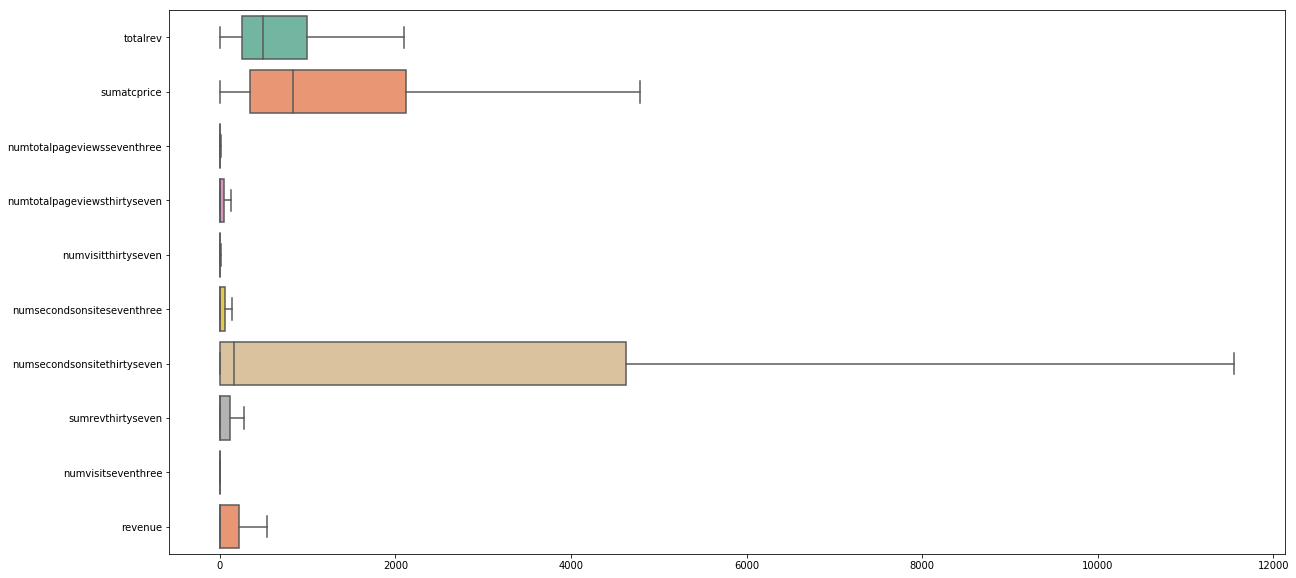

In [27]:
fig, axs = plt.subplots()
featuresdata = data[features]
sns.boxplot(data=featuresdata,orient='h',palette="Set2")
plt.show()

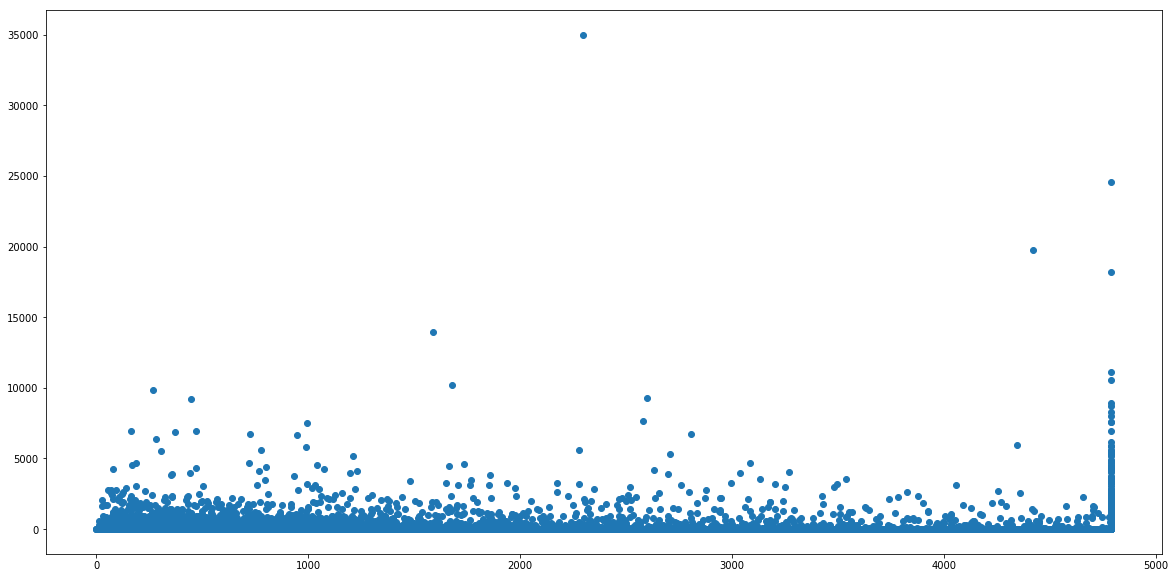

In [28]:
plt.scatter(x = data['sumatcprice'], y = data['revenue_30'],data = data)

In [29]:
from sklearn.linear_model import LinearRegression
train_x = data[['totalrev','sumatcprice','numtotalpageviewsseventhree','numtotalpageviewsthirtyseven','numvisitthirtyseven','numsecondsonsiteseventhree','numsecondsonsitethirtyseven','sumrevthirtyseven','numvisitseventhree','revenue']]
train_y = data['revenue_30']
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
test = pd.read_csv('df_holdout_scholarjet.csv')
test = test.interpolate(method='linear', limit_direction='both',axis=0)
test['revenue'] = test['sumrevone']+test['sumrevthreeone']+test['sumrevseventhree']+test['sumrevthirtyseven']
test_x = test[['totalrev','sumatcprice','numtotalpageviewsseventhree','numtotalpageviewsthirtyseven','numvisitthirtyseven','numsecondsonsiteseventhree','numsecondsonsitethirtyseven','sumrevthirtyseven','numvisitseventhree','revenue']]
predicted = model.predict(test_x)

In [31]:
model.score(train_x, train_y)

0.029673662226535228

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 6)
train_x_ = poly.fit_transform(train_x)
test_x_ = poly.fit_transform(test_x)

In [ ]:
model1 = LinearRegression()
model1.fit(train_x_,train_y)

In [ ]:
polypred = model1.predict(test_x_)

In [ ]:
model1.score(train_x_,train_y)

In [34]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [36]:
model = RandomForestRegressor(n_jobs=-1)

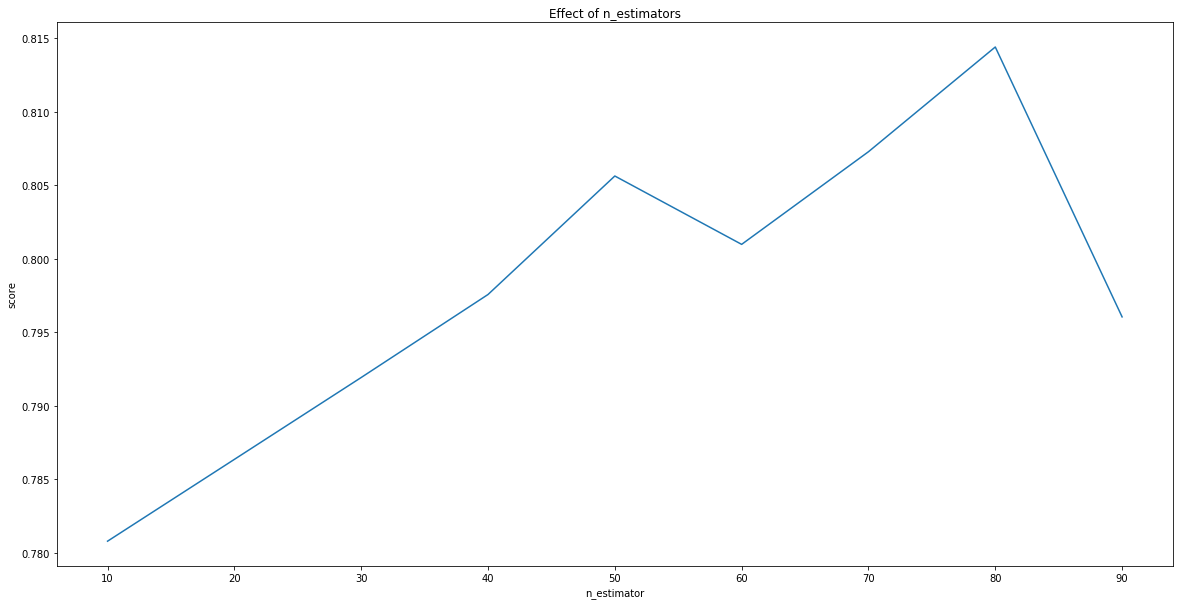

In [37]:
estimators = np.arange(10, 100, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(train_x, train_y)
    scores.append(model.score(train_x, train_y))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [38]:
scores

[0.7807823185019189,
 0.786348241791427,
 0.7919189980616856,
 0.7975656211003821,
 0.8056277713025377,
 0.8009769288386005,
 0.807279751191037,
 0.8144050062400482,
 0.7960427313818853]

In [39]:
model.score(train_x,train_y)

0.7960427313818852

In [40]:
pred_revenue_30 = model.predict(test_x)
pred_revenue_30

array([65.29682333, 35.35866667, 86.25824889, ...,  0.        ,
        0.        ,  0.        ])

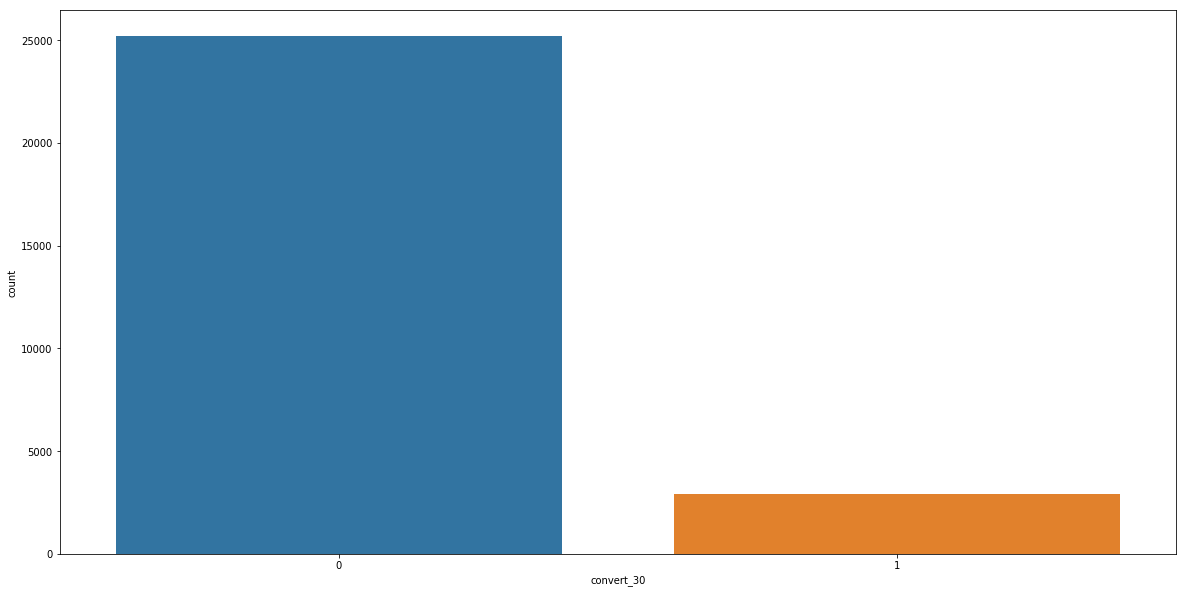

In [41]:
from sklearn.metrics import accuracy_score
sns.countplot(x = 'convert_30', data=data)

In [42]:
data.groupby('convert_30').mean()

Unnamed: 0           cuid  revenue_30  numorderone  \
convert_30                                                         
0           26994.944678  267317.733590    0.000000     0.021035   
1           21500.468921  253437.055669  720.815176     0.045578   

            numorderthreeone  numorderseventhree  numorderthirtyseven  \
convert_30                                                              
0                   0.036092            0.074967             0.312081   
1                   0.069516            0.147361             0.553345   

            numordersixtythirty  numorderyearsixty  sumrevone  sumrevthreeone  \
convert_30                                                                      
0                      0.296270           1.169317  11.079341       16.706893   
1                      0.482781           1.185125  24.008307       31.332466   

            sumrevseventhree  sumrevthirtyseven  sumrevsixtythirty  \
convert_30                                                           
0                  39.703668          62.875114         124.504328   
1                  87.421356          94.956598         204.043051   

            sumrevyearsixty  numbamorder  numselforder    totalrev  \
convert_30                                                           
0                515.207728     0.178477      1.731286  700.360356   
1                596.470430     0.241372      2.242334  828.999232   

                   aov  dayssincelastord  cuidshare  numstores  pospercentage  \
convert_30                                                                      
0           461.548519        701.538178   0.982281   1.074385      -0.003214   
1           500.667273        496.204235   0.980349   1.105757      -0.003602   

              numinf  numinfconnect  numinfphone  numinfquote  percentlarge  \
convert_30                                                                    
0           0.756283       0.282986     0.444967     0.054930      0.158684   
1           1.292580       0.480642     0.748881     0.121367      0.166378   

            percdirtythirty  percdirtyninetythirty  percdirtyyearninety  \
convert_30                                                                
0                  0.058490               0.052513             0.088280   
1                  0.110105               0.070736             0.060031   

            numbilling  numreturn   numwims  numproblem  numother  \
convert_30                                                          
0             0.293544   0.336386  0.577079    0.842823  0.958788   
1             0.296199   0.386529  0.625092    0.893113  1.048999   

            percentresolved    minnps    avgnps    maxnps  nps_count  \
convert_30                                                             
0                  0.706936  8.740489  8.773059  8.803692   1.088495   
1                  0.714915  8.856437  8.898793  8.938207   1.110175   

            numquote  numorderfromquote  quoteconrate  avgquoteprice  \
convert_30                                                             
0           1.904969           0.570566      0.333758    1881.494405   
1           2.009761           0.631279      0.344569    2053.334641   

            avgconquoteprice  numvisitone  numvisitthreeone  \
convert_30                                                    
0                1175.337416     0.186804          0.371117   
1                1301.232332     0.713257          1.354366   

            numvisitseventhree  numvisitthirtyseven  numvisitsixtythirty  \
convert_30                                                                 
0                     0.460972             2.968982             4.295933   
1                     1.147057             6.399391             9.521033   

            numvisityearsixty  numvisittotal  numloggedinone  \
convert_30                                                     
0                   26.166114      35.563332        0.107978   
1            

In [116]:
data_class = data
class_features = ['roll_up','team','customersource','companytypegroup','currentstatus','accrole']

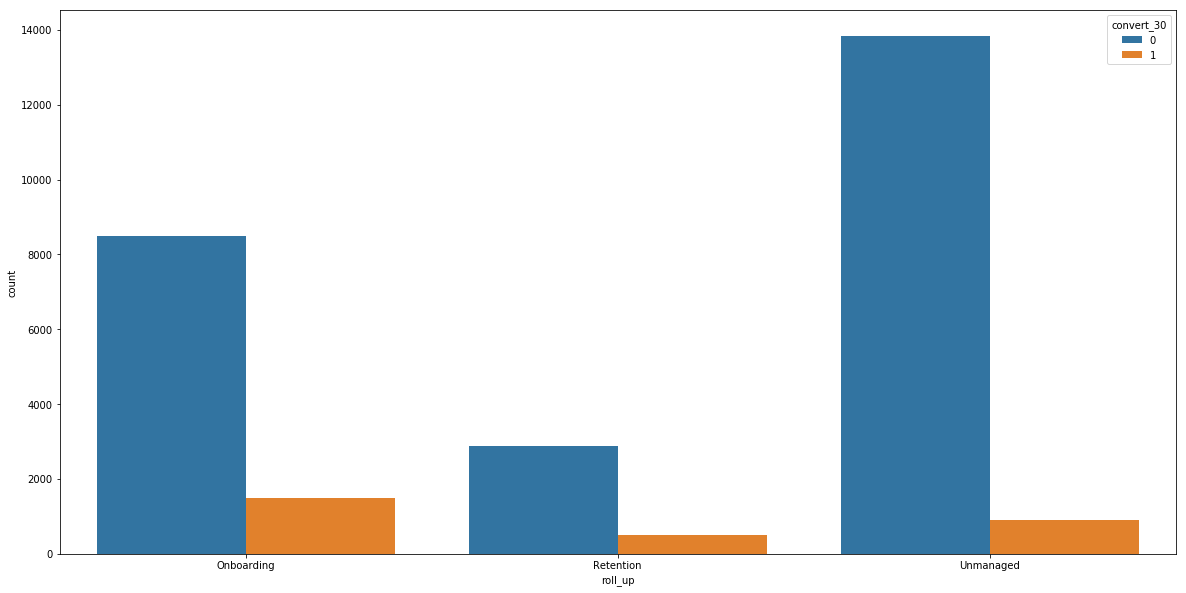

In [117]:
sns.countplot(x = 'roll_up', data = data_class, hue = 'convert_30')

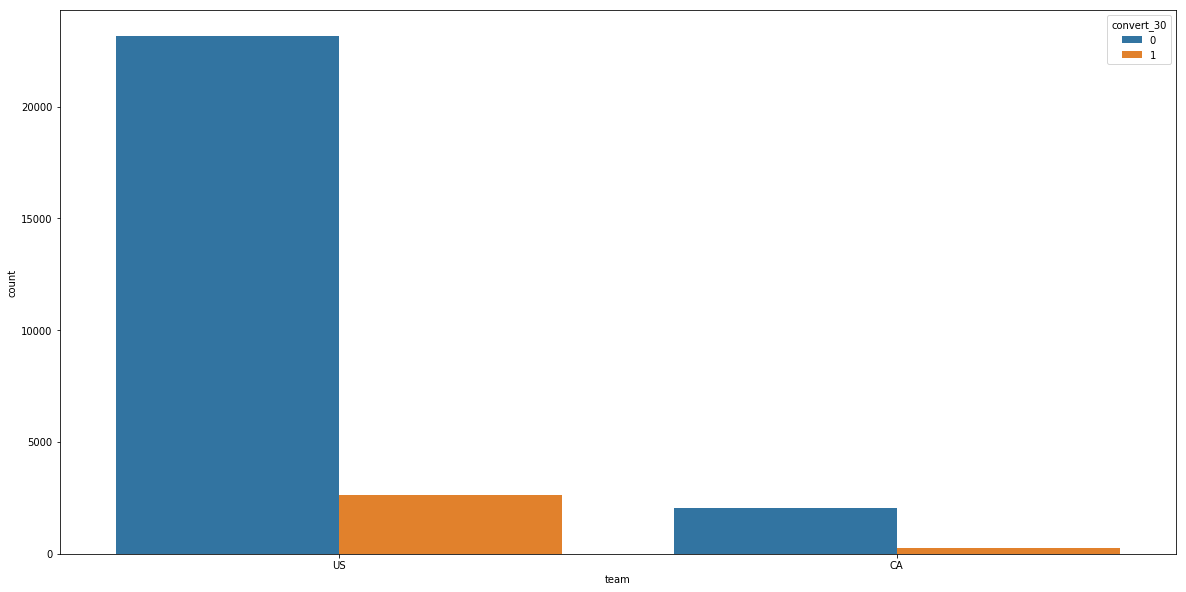

In [118]:
sns.countplot(x = 'team', data = data_class, hue = 'convert_30')

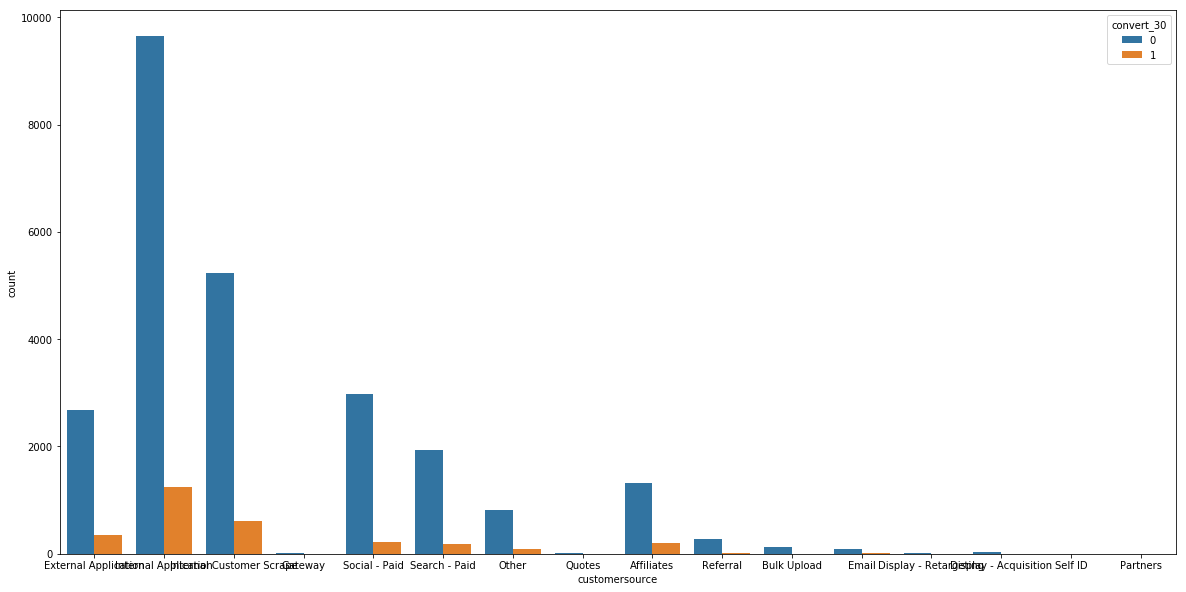

In [119]:
sns.countplot(x = 'customersource', data = data_class, hue = 'convert_30')

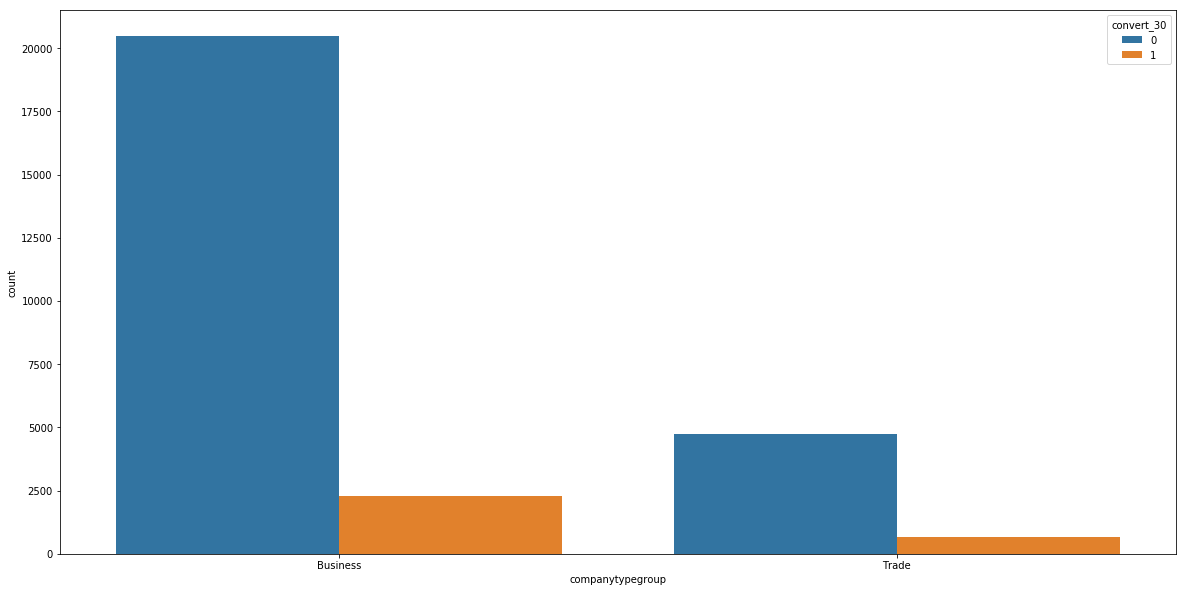

In [120]:
sns.countplot(x = 'companytypegroup', data = data_class, hue = 'convert_30')

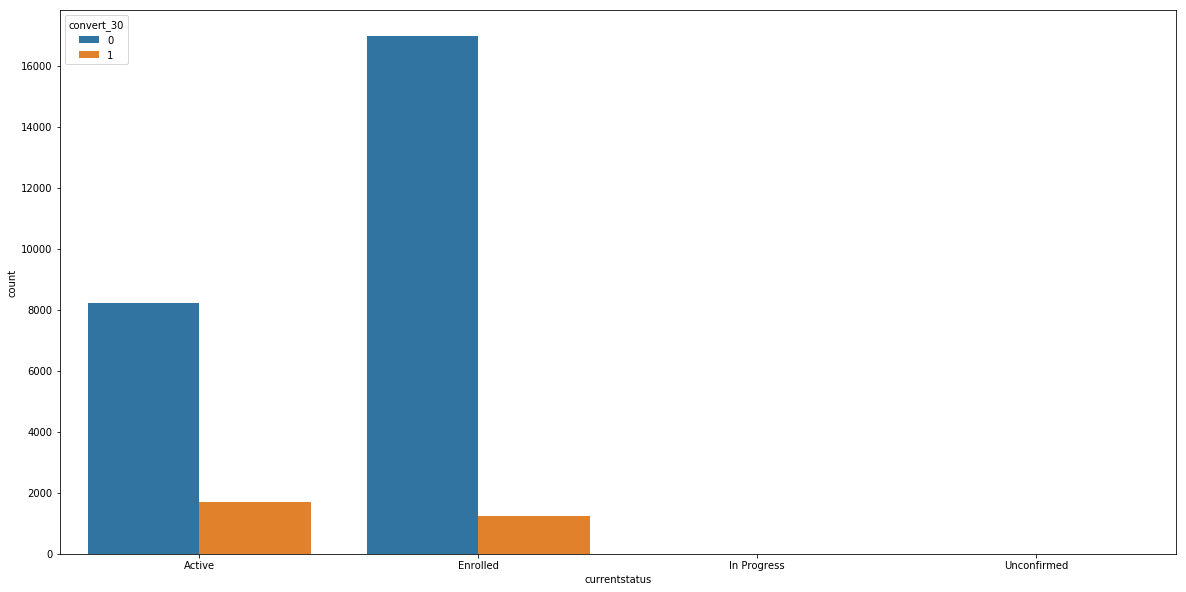

In [121]:
sns.countplot(x = 'currentstatus', data = data_class, hue = 'convert_30')

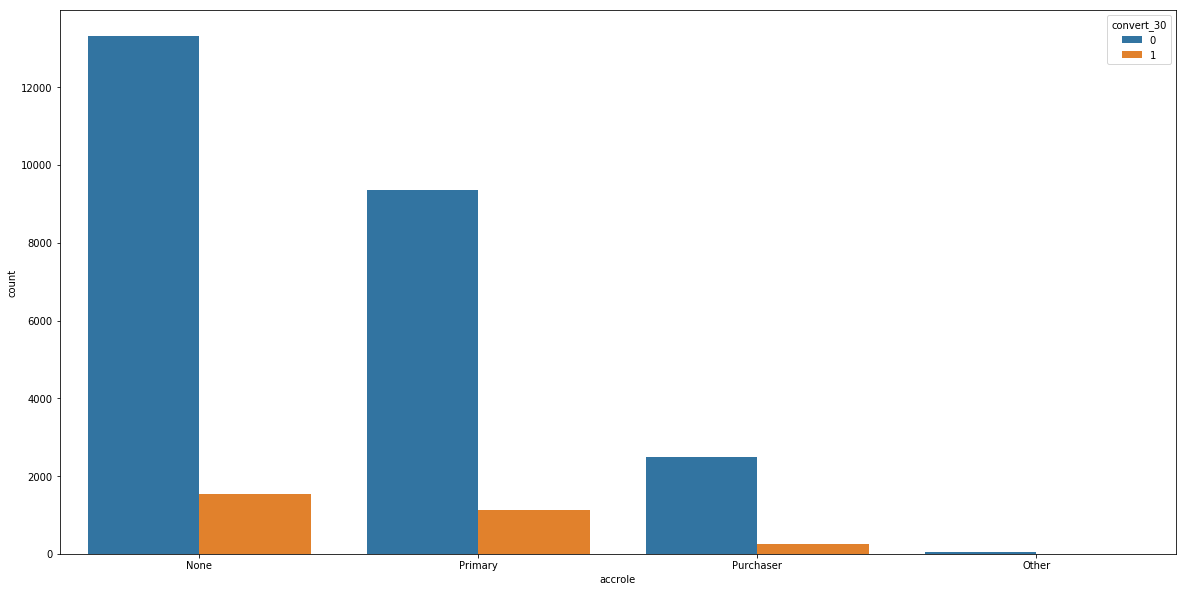

In [122]:
sns.countplot(x = 'accrole', data = data_class, hue = 'convert_30')

In [123]:
y_class = data['convert_30']
x_class_train = data[class_features]
x_class_train = pd.get_dummies(x_class_train)
x_class_train.head()

roll_up_Onboarding  roll_up_Retention  roll_up_Unmanaged  team_CA  team_US  \
0                   1                  0                  0        0        1   
1                   1                  0                  0        0        1   
2                   1                  0                  0        0        1   
3                   1                  0                  0        0        1   
4                   1                  0                  0        0        1   

   customersource_Affiliates  customersource_Bulk Upload  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

   customersource_Display - Acquisition  customersource_Display - Retargeting  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     0                                     0   
4                                     0                                     0   

   customersource_Email  customersource_External Application  \
0                     0                                    1   
1                     0                                    0   
2                     0                                    0   
3                     0                                    0   
4                     0                                    0   

   customersource_Gateway  customersource_Internal Application  \
0                       0                                    0   
1                       0                                    1   
2                       0                                    1   
3                       0                                    0   
4                       1                                    0   

   customersource_Internal Customer Scrape  customersource_Other  \
0                                        0                     0   
1                                        0                     0   
2                                        0                     0   
3                                        1                     0   
4                                        0                     0   

   customersource_Partners  customersource_Quotes  customersource_Referral  \
0                        0                      0                        0   
1                        0                      0                        0   
2                        0                      0                        0   
3                        0                      0                        0   
4                        0                      0                        0   

   customersource_Search - Paid  customersource_Self ID  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   customersource_Social - Paid  companytypegroup_Business  \
0                             0                          1   
1                             0                          1   
2                             0                          1   
3                             0                          1   
4                             0                          1   

   companytypegroup_Trade  currentstatus_Active  currentstatus_Enrolled  \
0                       0                     1                       0   
1                       0                     1                       0   
2                       0                     1        

In [124]:
x_class_test = test[class_features]
x_class_test = pd.get_dummies(x_class_test)
x_class_test.head()

roll_up_Onboarding  roll_up_Retention  roll_up_Unmanaged  team_CA  team_US  \
0                   1                  0                  0        0        1   
1                   1                  0                  0        0        1   
2                   1                  0                  0        0        1   
3                   1                  0                  0        0        1   
4                   1                  0                  0        0        1   

   customersource_Affiliates  customersource_Bulk Upload  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

   customersource_Display - Acquisition  customersource_Display - Retargeting  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     0                                     0   
4                                     0                                     0   

   customersource_Email  customersource_External Application  \
0                     0                                    0   
1                     0                                    0   
2                     0                                    0   
3                     0                                    0   
4                     0                                    0   

   customersource_Gateway  customersource_Internal Application  \
0                       0                                    1   
1                       0                                    0   
2                       0                                    1   
3                       0                                    1   
4                       0                                    0   

   customersource_Internal Customer Scrape  customersource_Other  \
0                                        0                     0   
1                                        0                     0   
2                                        0                     0   
3                                        0                     0   
4                                        1                     0   

   customersource_Partners  customersource_Quotes  customersource_Referral  \
0                        0                      0                        0   
1                        0                      0                        0   
2                        0                      0                        0   
3                        0                      0                        0   
4                        0                      0                        0   

   customersource_Search - Paid  customersource_Self ID  \
0                             0                       0   
1                             1                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   customersource_Social - Paid  companytypegroup_Business  \
0                             0                          1   
1                             0                          1   
2                             0                          1   
3                             0                          1   
4                             0                          0   

   companytypegroup_Trade  currentstatus_Active  currentstatus_Enrolled  \
0                       0                     0                       1   
1                       0                     0                       1   
2                       0                     0        

In [125]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(C=.01)

#fit logistic regression model
logmodel.fit(x_class_train, y_class)

#Make predictions on validation data
train_pred = logmodel.predict(x_class_train)
pred_convert_30 = logmodel.predict(x_class_test)

#Print Statistics
print(accuracy_score(y_class, train_pred))

0.895897034772097


c:\users\varun\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [134]:
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier
from sklearn.svm import SVC #Support Vector Machine
from sklearn.neighbors import KNeighborsClassifier #KNN

scaler = StandardScaler()
scaler.fit(x_class_train)
x_class_train = scaler.transform(x_class_train)
x_class_test = scaler.transform(x_class_test)
    
ks = [i + 1 for i in range(20)]
    
#Accuracy list
accuracy = [0 for i in range(20)]

#Loop through c_values
for i, k in enumerate(ks):
    #Create support vector machine object
    knn = KNeighborsClassifier(n_neighbors = k)

    #fit support vector machine model
    knn.fit(x_class_train, y_class)

    #Make predictions
    predictions = knn.predict(x_class_train)
    pred_convert_30 = knn.predict(x_class_test)

    #add accuracy score to accuracy list
    accuracy[i] = accuracy_score(y_class, predictions)
print(ks)
print(accuracy)
print("Best k Value:", ks[accuracy.index(max(accuracy))])

print("Prediction Accuracy: ", max(accuracy))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0.8004693166465192, 0.8799331579321624, 0.8678446988551518, 0.89330157149968, 0.8923771599232028, 0.8950081774870227, 0.8864040389675034, 0.8957192633150821, 0.8928393657114414, 0.8941193202019484, 0.8935148972480979, 0.8941548744933513, 0.8940837659105454, 0.8940837659105454, 0.8940482116191424, 0.895897034772097, 0.895897034772097, 0.895897034772097, 0.895897034772097, 0.895897034772097]
Best k Value: 16
Prediction Accuracy:  0.895897034772097


In [135]:
pred_convert_30

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [136]:
results = pd.DataFrame(columns=['cuid','pred_revenue_30','pred_convert_30'])

In [137]:
results['cuid'] = test['cuid']
results['pred_revenue_30'] = pred_revenue_30
results['pred_convert_30'] = pred_convert_30

In [138]:
results

cuid  pred_revenue_30  pred_convert_30
0       16838        65.296823                0
1      532175        35.358667                0
2      532176        86.258249                0
3      532187       115.897333                0
4       16938        87.892351                0
5      532189       111.873558                0
6       16948        85.111933                0
7      532197       315.060333                0
8       17017         0.000000                0
9       17020       195.949659                0
10     532205       249.408349                0
11     532211         0.000000                0
12      17139       306.159484                0
13      17267        64.252522                0
14     532226        82.732556                0
15      17291         0.000000                0
16      17308         3.216889                0
17     532231        42.479111                0
18      17378         2.166333                0
19      17390       390.937917                0
20      17431       810.375733                0
21      17478       157.155853                0
22      17545        82.120333                0
23      17572        11.815444                0
24      17633       147.381556                0
25     532266       784.003000                0
26     532276        23.666556                0
27     532286       181.958222                0
28      17882       274.499222                0
29     532296       204.416556                0
30      17953         0.000000                0
31      18007        32.528667                0
32     532314        54.519694                0
33     532315       113.538518                0
34     532317        99.459778                0
35      18118        94.901889                0
36      18142       202.257139                0
37      18175        26.675000                0
38      18178        11.497222                0
39      18290       103.556811                0
40      18337         4.530111                0
41      18366       418.354767                0
42      18434        16.432667                0
43      18469        93.479792                0
44      18499        34.723444                0
45      18594       153.793444                0
46      18617       317.042602                0
47      18621        44.219444                0
48      18633        50.521667                0
49     532381        91.037367                0
50      18781        76.915307                0
51      18948        14.150297                0
52      18958        47.382820                0
53      18963         6.120889                0
54      18989       272.091116                0
55      19036         3.646889                0
56     532420        79.574556                0
57      19117        98.552690                0
58     532425        15.592667                0
59      19162        86.220387                0
60     532432         0.000000                0
61      19214       186.609616                0
62      19313        98.160621                0
63      19361        49.546222                0
64      19384        10.103762                0
65      19472         9.490333                0
66      93194       125.501471                0
67      93210        82.209798                0
68      93214        52.467111                0
69     532467        12.006111                0
70      93283       149.420329                0
71     532480       115.168922                0
72      93402         4.888667                0
73      93465       810.375733                0
74      93601         2.421778                0
75     532514        24.035000                0
76      93741         4.499778                0
77      93781        14.630362                0
78      93822        43.752324                0
79      93842        55.661222                0
80      93846        19.954889                0
81      93904       608.627667                0
82      93908         0.0

In [139]:
results.to_csv('results.csv')